In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [169]:
profile = pd.read_csv('dataset/user_profile.csv')
first = pd.read_csv('dataset/first_session.csv')
engagement = pd.read_csv('dataset/user_engagement.csv')

/Users/bassim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
profile.head()

,Unnamed: 0,user_id,user_signup_timestamp,state,zipcode,is_homeowner,gender,tradelines_avg_days_since_opened,tradelines_max_days_since_opened,tradelines_min_days_since_opened,...,total_mortgage_loans_balance,total_auto_loans_balance,total_student_loans_balance,count_inquiries_3_months,count_inquiries_6_months,count_inquiries_12_months,recent_bankruptcy_date,count_bankruptcy,age_bucket,credit_score_bucket
0,0,50991631a5e7fafd8b5856fc15e3d1a3af5dcf98,2018-07-25 21:06:12,AR,72762,True,Female,2385.16,7446.0,481.0,...,26049.0,0.0,0.0,0,0,0,NaN,0,"(45.0, 50.0]","(630.0, 635.0]"
1,1,18db173b8b0fb250985a4db2f3f8593ee9658707,2018-07-01 22:01:56,NE,68111,False,NaN,909.25,1780.0,152.0,...,0.0,12992.0,0.0,0,0,1,NaN,0,"(50.0, 55.0]","(575.0, 580.0]"
2,2,cabee62f0c4f26bb088f4a48d9ca5efa3a4f96e3,2018-07-02 08:47:21,AL,36078,False,Male,1544.00,3975.0,251.0,...,86987.0,0.0,0.0,0,0,1,NaN,0,"(50.0, 55.0]","(685.0, 690.0]"
3,3,bb34f48b56a57e834c5c612b835d5a691f7357e8,2018-07-02 02:07:53,MT,59923,True,Unisex,831.60,2573.0,40.0,...,148912.0,46046.0,0.0,3,3,12,NaN,0,"(50.0, 55.0]","(625.0, 630.0]"
4,4,6da929725c76c01aa151d97060df2e6bd051e31e,2018-07-03 17:36:42,PA,19040,False,Female,1226.60,2510.0,186.0,...,0.0,16262.0,24134.0,0,0,3,NaN,0,"(20.0, 25.0]","(630.0, 635.0]"


In [13]:
first.drop(['Unnamed: 0','session_id','session_start_timestamp','user_signup_timestamp','action_timestamp','offer_card_id','offer_lender','offer_page_position','browser_version','app_version','os_name'], axis=1,inplace=True)



In [34]:
first['browser_name'].value_counts()

CREDIT_CARDS       2545886
CREDIT_PRODUCTS     564602
PERSONAL_LOANS      248069
MORTGAGES           179196
PERSONAL_LOAN        49230
BANKING              48062
AUTO_LOAN            41797
CREDIT_REPAIR        10500
PREMIUM                568
AUTO_INSURANCE         407
PREMIUMSERVICE         180
ADVERTISING            163
Name: offer_product, dtype: int64

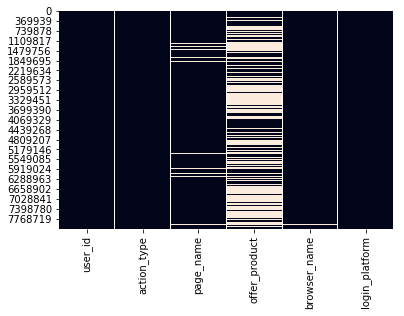

In [21]:
sns.heatmap(first.isnull(), cbar=False)

In [39]:
categorical_columns = [col for col in first.columns if col != 'user_id']
first = pd.get_dummies(first, columns= categorical_columns, dummy_na= True)

In [42]:
first.shape

(8138651, 167)

In [41]:
first.columns

Index(['user_id', 'action_type_CLICK', 'action_type_CLICK_APPLY',
       'action_type_LOGGED_IN', 'action_type_VIEW_OFFER',
       'action_type_VIEW_PAGE', 'action_type_nan', 'page_name_AOOP_OVERVIEW',
       'page_name_CC_BEST_CARDS', 'page_name_CC_DETAILS',
       ...
       'browser_name_Safari 8', 'browser_name_Safari 9', 'browser_name_Silk',
       'browser_name_Unknown', 'browser_name_Vivaldi', 'browser_name_nan',
       'login_platform_Mobile App', 'login_platform_Mobile Web',
       'login_platform_Web', 'login_platform_nan'],
      dtype='object', length=167)

In [40]:
first.head()

,user_id,action_type_CLICK,action_type_CLICK_APPLY,action_type_LOGGED_IN,action_type_VIEW_OFFER,action_type_VIEW_PAGE,action_type_nan,page_name_AOOP_OVERVIEW,page_name_CC_BEST_CARDS,page_name_CC_DETAILS,...,browser_name_Safari 8,browser_name_Safari 9,browser_name_Silk,browser_name_Unknown,browser_name_Vivaldi,browser_name_nan,login_platform_Mobile App,login_platform_Mobile Web,login_platform_Web,login_platform_nan
0,f62a28b472cd2bc1d9dde65795aaaf443f624c35,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,acb0e8ad94ec4c312994c5470e904482e9658d2c,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1372d7e3254ca0898cb69723c8baf66599453fd7,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,a9b3bcfeb31897a3057bd88a313299332004264c,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,03b0daa0bb58ae46205d8fc3f5f783885370cec8,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
part_1 = first.groupby('user_id').sum()

In [57]:
act_cols = [col for col in part_1.columns if col[:6]=='action']
part_1 = part_1[act_cols]
part_1.tail()

,action_type_CLICK,action_type_CLICK_APPLY,action_type_LOGGED_IN,action_type_VIEW_OFFER,action_type_VIEW_PAGE,action_type_nan
user_id,,,,,,
fffdfe497fc99a698ea2f817bb06bf0ff7031076,0.0,1.0,1.0,12.0,4.0,0.0
fffe100679c76ef27961f3260d1e6cc95e81e13f,11.0,3.0,1.0,37.0,14.0,0.0
fffee1bbf7d5e25407d70e4b121a406b5c1f7185,0.0,0.0,1.0,3.0,2.0,0.0
ffff3e65754e88ebb32b2441309313639a275c13,10.0,1.0,2.0,12.0,7.0,0.0
ffff9d7ff28324fdde2fda4ef3011bd519393734,8.0,0.0,1.0,68.0,18.0,0.0


In [63]:
count_cols = [x for x in first.columns if x not in act_cols]

,user_id,page_name_AOOP_OVERVIEW,page_name_CC_BEST_CARDS,page_name_CC_DETAILS,page_name_CC_MARKETPLACE,page_name_CREDIT_MONITORING,page_name_LOG_IN,page_name_MY_BORROWING_POWER,page_name_MY_CREDIT,page_name_MY_CREDIT_REPORT,...,browser_name_Safari 8,browser_name_Safari 9,browser_name_Silk,browser_name_Unknown,browser_name_Vivaldi,browser_name_nan,login_platform_Mobile App,login_platform_Mobile Web,login_platform_Web,login_platform_nan
0,f62a28b472cd2bc1d9dde65795aaaf443f624c35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,acb0e8ad94ec4c312994c5470e904482e9658d2c,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1372d7e3254ca0898cb69723c8baf66599453fd7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,a9b3bcfeb31897a3057bd88a313299332004264c,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,03b0daa0bb58ae46205d8fc3f5f783885370cec8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
part_2 = first[count_cols].groupby('user_id').max()

In [67]:
final_first = part_2.join(part_1,how='outer')

In [170]:
profile = profile[['user_id','gender','credit_score_bucket','max_cc_limit','total_mortgage_loans_balance','total_mortgage_loans_amount','total_auto_loans_balance','total_student_loans_balance','count_bankruptcy']]
profile.head()

,user_id,gender,credit_score_bucket,max_cc_limit,total_mortgage_loans_balance,total_mortgage_loans_amount,total_auto_loans_balance,total_student_loans_balance,count_bankruptcy
0,50991631a5e7fafd8b5856fc15e3d1a3af5dcf98,Female,"(630.0, 635.0]",1000.0,26049.0,64600.0,0.0,0.0,0
1,18db173b8b0fb250985a4db2f3f8593ee9658707,NaN,"(575.0, 580.0]",1150.0,0.0,0.0,12992.0,0.0,0
2,cabee62f0c4f26bb088f4a48d9ca5efa3a4f96e3,Male,"(685.0, 690.0]",0.0,86987.0,94918.0,0.0,0.0,0
3,bb34f48b56a57e834c5c612b835d5a691f7357e8,Unisex,"(625.0, 630.0]",2500.0,148912.0,150000.0,46046.0,0.0,0
4,6da929725c76c01aa151d97060df2e6bd051e31e,Female,"(630.0, 635.0]",5000.0,0.0,0.0,16262.0,24134.0,0


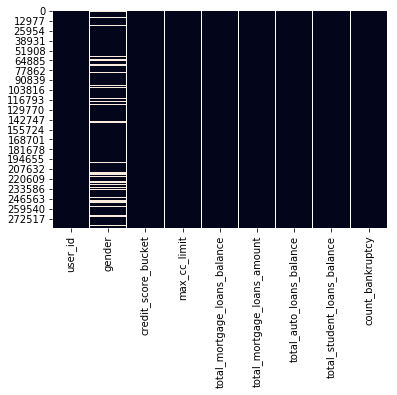

In [171]:
sns.heatmap(profile.isnull(), cbar=False)

In [172]:
c_score = []
for val in profile['credit_score_bucket']:
    first_val = float(val[1:6])
    second_val = float(val[8:13])
    c_score.append((first_val+second_val)/2)
c_score = pd.Series(c_score)
profile['credit_score_bucket'] = c_score

In [174]:
categorical_columns = ['gender']
profile = pd.get_dummies(profile, columns= categorical_columns, dummy_na= True)

In [175]:
profile.set_index('user_id',inplace=True)

In [176]:
min_max_scaler = preprocessing.MinMaxScaler()
profile.iloc[:,:6] = min_max_scaler.fit_transform(profile.iloc[:,:6])

In [177]:
table_1 = profile.join(final_first,how='outer')

In [178]:
table_1.head()

,credit_score_bucket,max_cc_limit,total_mortgage_loans_balance,total_mortgage_loans_amount,total_auto_loans_balance,total_student_loans_balance,count_bankruptcy,gender_Female,gender_Male,gender_Unisex,...,login_platform_Mobile App,login_platform_Mobile Web,login_platform_Web,login_platform_nan,action_type_CLICK,action_type_CLICK_APPLY,action_type_LOGGED_IN,action_type_VIEW_OFFER,action_type_VIEW_PAGE,action_type_nan
user_id,,,,,,,,,,,,,,,,,,,,,
0000485dbdc19e76bedcaf155b4de9491f414a27,0.083333,0.0000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0,0.0
00008fb52ca81c6767db31f58ea37e7229c372e1,0.100000,0.0000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,16.0,0.0
000091252c68230bd55a9abda98896c8610994bc,0.100000,0.0000,0.000000,0.000000,0.012851,0.000000,0,0,1,0,...,1.0,0.0,0.0,0.0,17.0,2.0,1.0,12.0,15.0,0.0
000091d428154729cbf338d4f51aa95af254d342,0.433333,0.0035,0.000000,0.000000,0.000000,0.000000,0,0,0,1,...,0.0,0.0,1.0,0.0,6.0,0.0,1.0,18.0,10.0,0.0
0000b28d30dd9cf2424e83822b2877fec98b7de5,0.333333,0.1000,0.032777,0.034898,0.000000,0.007377,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0


In [179]:
# sampling time

sample = table_1.sample(n=10000,random_state=24)
#sample.to_csv('user_profile.csv')